In [ ]:
from google.colab import files
uploaded = files.upload()


Saving blood.csv to blood.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('blood.csv')

# Check basic structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [ ]:
print(df.columns.tolist())


['Recency', 'Frequency', 'Monetary', 'Time', 'Class']


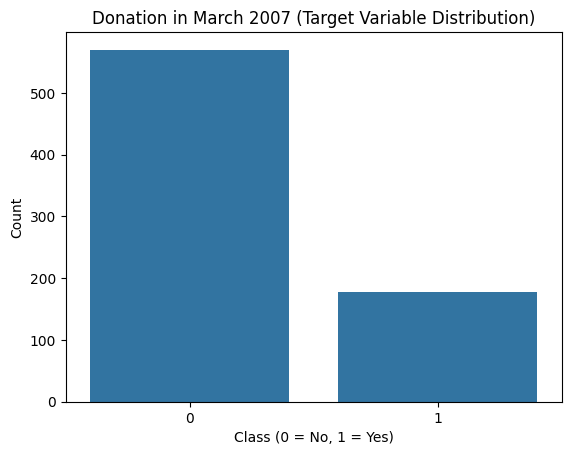

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Donation in March 2007 (Target Variable Distribution)")
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


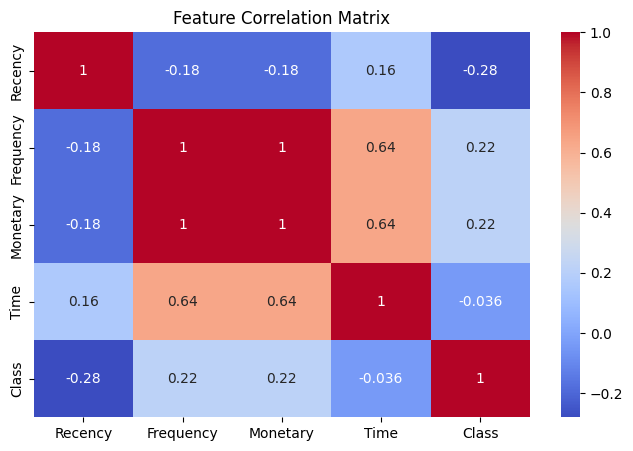

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.7666666666666667
Precision: 0.5714285714285714
Recall: 0.1111111111111111
F1 Score: 0.18604651162790697


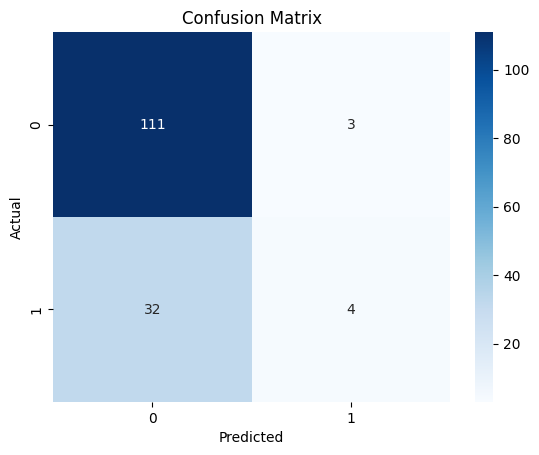


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy and core metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
